In [20]:
import math
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

scl = StandardScaler()
poly = PolynomialFeatures(2,include_bias = False)


In [21]:
dataPath = 'water_potability.csv'
def loadData():
    global data, label, dataPath, xTr, xCV, yTr, yCV, scl, poly
    dataAll = np.genfromtxt(dataPath,delimiter = ',', skip_header=1)
    data = dataAll[:,:8]
    label = dataAll[:,9].reshape(-1,1)
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    data = imp.fit_transform(data)
    xTr, xCV, yTr, yCV = train_test_split(data, label, test_size = 0.17,random_state=0)
    #xTr = xTr.reshape(-1,)
    #xCV = xCV.reshape(-1,)
    #yTr = yTr.reshape(-1,1)
    #yCV = yCV.reshape(-1,1)
    xTr = scl.fit_transform(xTr)
    xCV = scl.transform(xCV)

def poly():
    global data, label, dataPath, xTr, xCV, yTr, yCV, scl, poly
    xTr = poly.fit_transform(xTr)
    xCV = poly.transform(xCV)

In [22]:
def svmachine():
    global accSVM,recSVM,preSVM, xTr,xCV,yTr,yCV
    machine = svm.SVC(C = 3, kernel='poly', gamma = 'auto')
    machine.fit(xTr,yTr)
    machinePred = machine.predict(xCV)
    accSVM = accuracy_score(yCV,machinePred)
    recSVM = recall_score(yCV,machinePred)
    preSVM = precision_score(yCV,machinePred)
    print('SVM ACC: ' + str(accSVM))

def logisticRegression():
    global accLog, recLog, preLog, xTr,xCV,yTr,yCV
    logReg = LogisticRegression(max_iter=1000000)
    logReg.fit(xTr,yTr)
    logPred = logReg.predict(xCV)
    accLog = accuracy_score(yCV,logPred)
    recLog = recall_score(yCV,logPred)
    preLog = precision_score(yCV,logPred)
    print('LogReg ACC: '+ str(accLog))


def randomForest():
    global accTree, recTree, preTree, xTr,xCV,yTr,yCV
    tree = RandomForestClassifier(n_estimators=10000, max_depth = 10, random_state=0)
    tree.fit(xTr,yTr)
    treePred = tree.predict(xCV)
    accTree = accuracy_score(yCV,treePred)
    recTree = recall_score(yCV,treePred)
    preTree = precision_score(yCV,treePred)
    print('RF ACC: ' + str(accTree))


def neural():
    global accNN, recNN, preNN, xTr,xCV,yTr,yCV
    batch_size = 128
    hidden_units = 256
    dropout = 0.45
    input_size = len(xTr[1])
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    model.fit(xTr, yTr, epochs=20, batch_size=batch_size)
    loss, acc = model.evaluate(xCV, yCV, batch_size=batch_size)



In [23]:
loadData()
svmachine()
logisticRegression()
randomForest()
neural()

SVM ACC: 0.6319569120287253
LogReg ACC: 0.6211849192100538
RF ACC: 0.6714542190305206
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               2304      
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
__________________________________

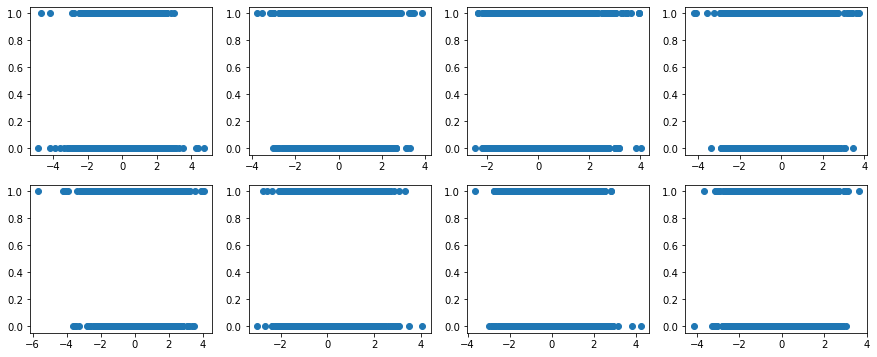

In [24]:
fig, axs = plt.subplots(2, 4,figsize=(15,6))
axs[0,0].scatter(xTr[:,0],yTr)
axs[0,1].scatter(xTr[:,1],yTr)
axs[0,2].scatter(xTr[:,2],yTr)
axs[0,3].scatter(xTr[:,3],yTr)
axs[1,0].scatter(xTr[:,4],yTr)
axs[1,1].scatter(xTr[:,5],yTr)
axs[1,2].scatter(xTr[:,6],yTr)
axs[1,3].scatter(xTr[:,7],yTr)
#Looks like it would be very difficult to rule out features this way.

